### This file plots the processed csv files with matplotlib

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [3]:
date = '2018-11-04_00h57'
worker_list = [8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/' + date + '/'

## Throughput plot for read loads

In [4]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'one_mw_mem_tp.csv')
df_tp

,client,worker,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,6,8,2784.204762,59.100781,2755.057143,47.761996
1,6,16,2742.190476,60.899780,2758.857143,33.237183
2,6,32,2653.761905,6.474075,2737.661905,29.229810
3,6,64,2679.028571,16.704405,2704.085714,26.729944
4,24,8,6281.623810,410.263848,2955.473374,2.134447
5,24,16,6244.042857,410.445574,2958.177867,2.431339
6,24,32,6343.371429,155.297881,2959.538162,2.773655
7,24,64,6443.766667,52.961817,2960.047619,2.292856
8,48,8,6613.050369,176.033780,2960.514554,0.313593
9,48,16,7336.895238,103.563653,2965.455466,0.844225


In [5]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

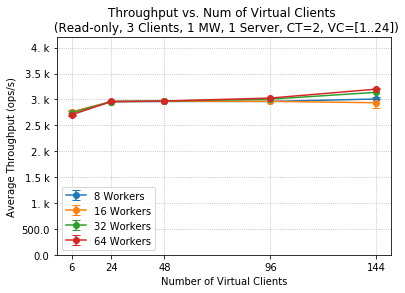

In [6]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['read_tp_mean']
    std = df_tp_cut['read_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e3+np.max(df_tp['read_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_mem_tp_read.png", dpi = 150)


## Throughput plot for write loads

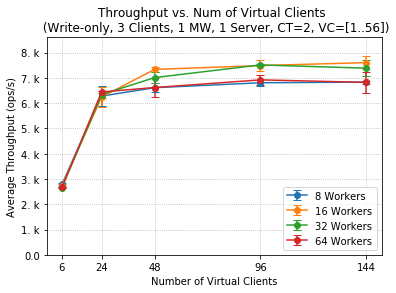

In [7]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_tp_read_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_read_cut['client']
    tps = df_tp_read_cut['write_tp_mean']
    std = df_tp_read_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e3+np.max(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_mem_tp_write.png", dpi = 150)


## Response-time plot for read loads

In [8]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'one_mw_mem_rt.csv')
df_rt

,client,worker,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,6,8,2.160810,0.045142,2.178778,0.039167
1,6,16,2.196524,0.044798,2.173810,0.024579
2,6,32,2.267143,0.005960,2.189730,0.022472
3,6,64,2.245127,0.013171,2.216508,0.021100
4,24,8,3.845270,0.251948,8.111588,0.006152
5,24,16,3.867413,0.249528,8.109112,0.008844
6,24,32,3.799603,0.095138,8.100772,0.006272
7,24,64,3.739508,0.030478,8.099651,0.008944
8,48,8,7.268210,0.191192,16.195138,0.002175
9,48,16,6.546508,0.097000,16.172725,0.001970


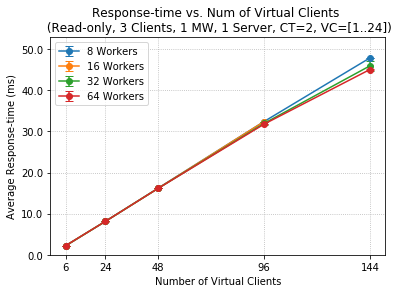

In [9]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['read_rt_mean']
    std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['read_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_mem_rt_read.png", dpi = 150)


## Response-time plot for write loads

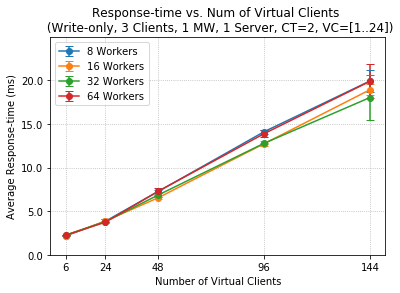

In [11]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_mem_rt_write.png", dpi = 150)
